# —Why the best and most experienced employees is leaving the company?

- Bagaimana karakteristik employee yang keluar dari company?
- Apa saja hal yang mempengaruhi employee keluar dari company?

# Load dataset

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# visualizing
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
colors = ['#A6A6A6', '#EE0000']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_theme(style = 'ticks', rc = custom_params, font = 'sans-serif', palette = customPalette)

In [2]:
url = 'https://drive.google.com/file/d/1X4YVWsaezU2Q2eds6sb8Fj-WVmQuumKr/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

raw = pd.read_csv(url)
df = raw.copy()

In [3]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
3699,0.96,0.75,4,165,3,0,0,0,technical,high
3663,0.24,0.70,5,172,4,0,0,0,sales,high
10605,0.61,0.75,3,140,3,0,0,0,RandD,low
4937,0.56,0.58,3,173,3,0,0,0,support,medium
9678,0.78,0.86,3,210,3,0,0,0,management,medium


# Exploratory Data Analysis

In [4]:
# informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# banyak nilai unik setiap kolom
for col in df.columns:
    print(f'banyak nilai unik pada kolom {col}: {df[col].nunique()}')

banyak nilai unik pada kolom satisfaction_level: 92
banyak nilai unik pada kolom last_evaluation: 65
banyak nilai unik pada kolom number_project: 6
banyak nilai unik pada kolom average_montly_hours: 215
banyak nilai unik pada kolom time_spend_company: 8
banyak nilai unik pada kolom Work_accident: 2
banyak nilai unik pada kolom left: 2
banyak nilai unik pada kolom promotion_last_5years: 2
banyak nilai unik pada kolom sales: 10
banyak nilai unik pada kolom salary: 3


- Terdapat 14,999 baris dan 10 kolom yang terdiri atas 5 kolom numerical, 3 kolom boolean, dan 2 kolom categorical. 
- Tidak terdapat missing values pada dataset.

In [6]:
df = df.astype({'Work_accident' : bool, 'left' : bool, 'promotion_last_5years' : bool})

# persentase nilai unik untuk feature boolean
boolean = ['Work_accident', 'left', 'promotion_last_5years']
for col in boolean:
    print(f'persentase nilai pada kolom {col}:')
    print(df[col].value_counts(normalize = True) * 100)
    print()

persentase nilai pada kolom Work_accident:
False    85.539036
True     14.460964
Name: Work_accident, dtype: float64

persentase nilai pada kolom left:
False    76.191746
True     23.808254
Name: left, dtype: float64

persentase nilai pada kolom promotion_last_5years:
False    97.873192
True      2.126808
Name: promotion_last_5years, dtype: float64



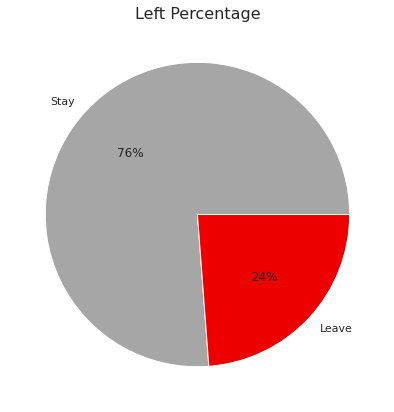

In [7]:
rcParams['figure.figsize'] = 7, 7

data = df.groupby('left').count().reset_index()['sales']
labels = ['Stay', 'Leave']

# create pie chart for 'left'
plt.pie(data, labels = labels, autopct = '%.0f%%')
plt.title('Left Percentage', fontsize = 16)
plt.show()

Mayoritas employee berasal dari kelompok:
- Work_accident = 0 (85.8%) >> tidak mengalami kecelakaan kerja
- left = 0 (76.2%) >> tidak keluar dari company
- promotion_last_5years = 0 (97.9%) >> tidak mendapatkan promosi selama 5 tahun terakhir

## Numerical features

In [8]:
num = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# ringkasan statistik kolom numerical
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0


- Seluruh kolom memiliki nilai rata-rata yang mendekati nilai median, distribusinya hampir simetris secara keseluruhan.
- Tidak terdapat data yang "aneh" pada dataset.

In [9]:
df.groupby('left').agg({'satisfaction_level' : ['mean'],
                       'last_evaluation' : ['mean'],
                       'number_project' : ['mean'],
                       'average_montly_hours' : ['mean'],
                       'time_spend_company' : ['mean']}).transpose()

,left,False,True
satisfaction_level,mean,0.666810,0.440098
last_evaluation,mean,0.715473,0.718113
number_project,mean,3.786664,3.855503
average_montly_hours,mean,199.060203,207.419210
time_spend_company,mean,3.380032,3.876505


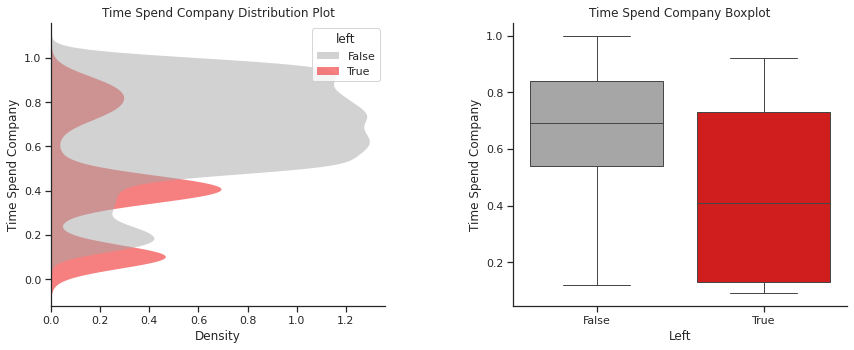

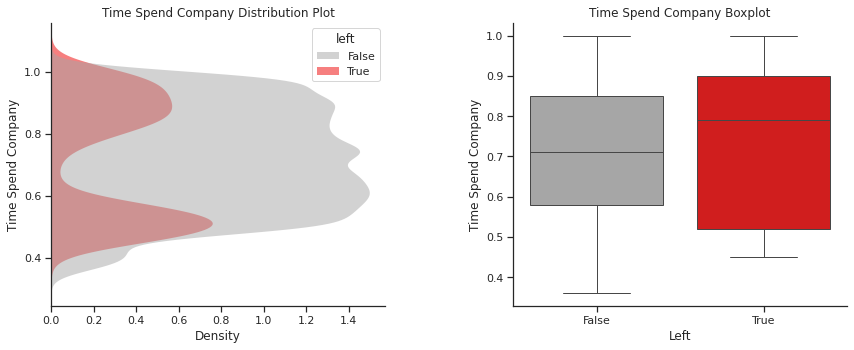

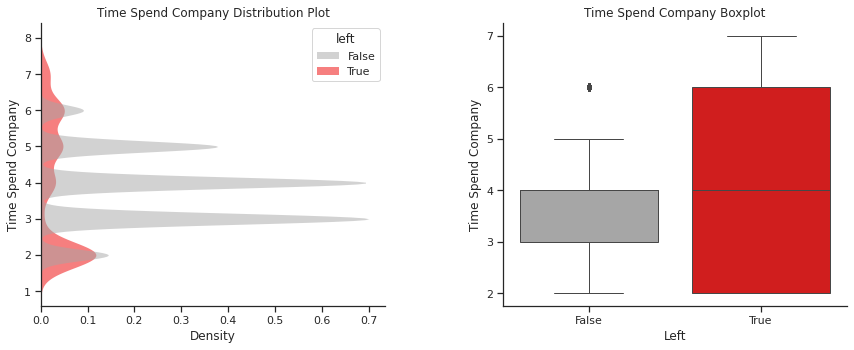

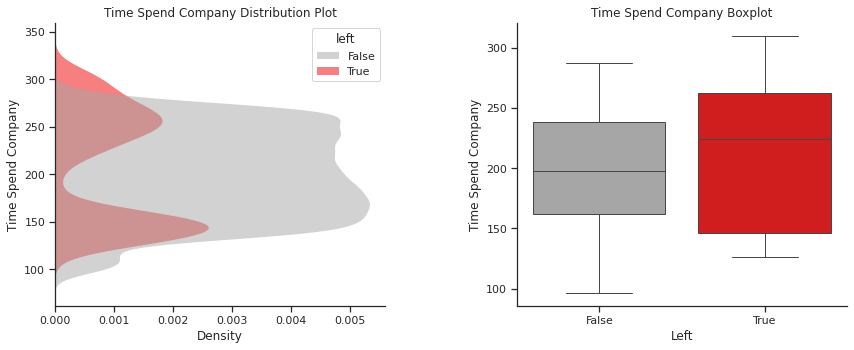

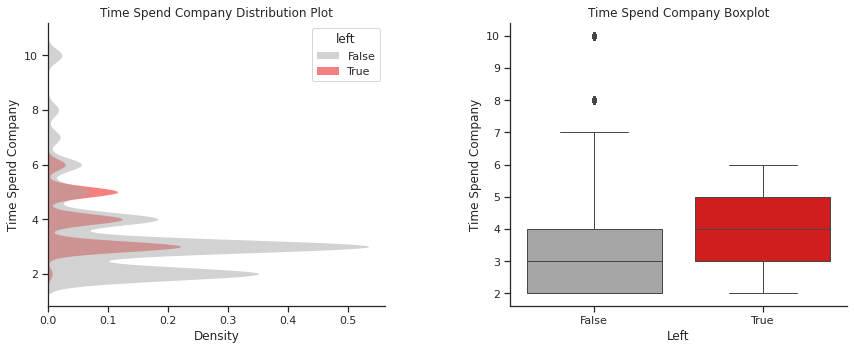

In [11]:
rcParams['figure.figsize'] = 14, 7
for i in range (0, len (num)):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  sns.kdeplot(y = df[num[i]], hue = df['left'], fill = True, ax = ax1, linewidth = 0, alpha = .5).set(title = f'Time Spend Company Distribution Plot')
  sns.boxplot(y = df[num[i]], x = df['left'], ax = ax2, linewidth = 1).set(title = 'Time Spend Company Boxplot')
  ax1.set_ylabel('Time Spend Company')
  ax2.set_ylabel('Time Spend Company')
  ax2.set_xlabel('Left')
  plt.tight_layout()
  fig.tight_layout(pad = 7)
  plt.show()

Employees yang bertahan pada company cenderung:
- satisfaction atau tingkat kepuasan yang relatif tinggi terhadap company.
- nilai evaluasi yang cukup padat pada nilai last_evaluation lebih dari 0.4
- jumlah projek yang dikerjakan paling banyak sebanyak 3 atau 4
- memiliki waktu kerja paling banyak pada rentang 150-250 hours/month
- menghabiskan waktu di company untuk bekerja paling banyak sekitar 2-4 

Text(0.5, 1.0, 'Correlation Heatmap')

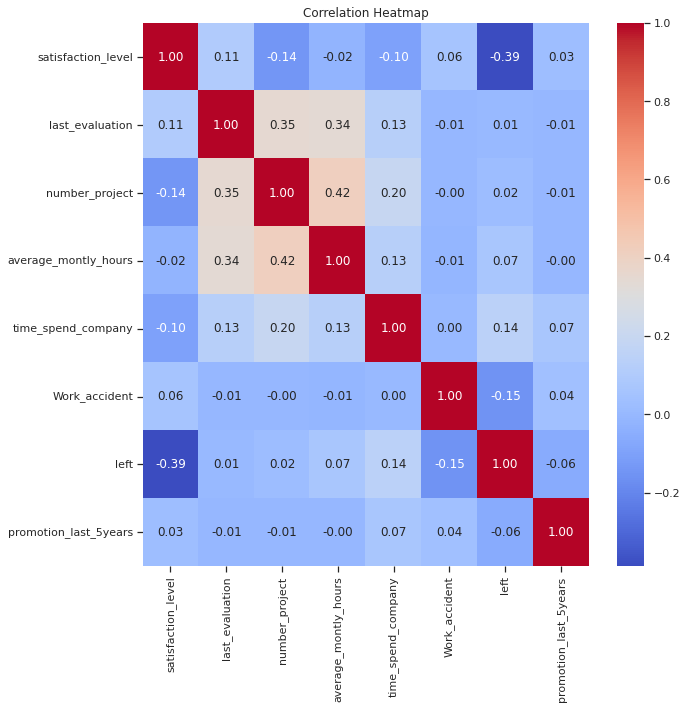

In [13]:
# numeric correlation
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Correlation Heatmap')

Feature yang memiliki nilai korelasi cukup tinggi dengan **left**:
- satisfaction_level (-0.39)
- Work_accident (-0.15)
- time_spend_sompany (0.14)

Employee yang meninggalkan company (left = 1) cenderung memiliki kepuasan kerja yang rendah, tidak mengalami kecelakaan kerja, dan memiliki waktu bekerja yang cukup lama.

Selain itu, terdapat feature yang saling memiliki korelasi cukup tinggi:
- number_project - average_monthly_hours - last_evaluation >> semakin banyak project yang dikerjakan, maka akan semakin lama waktu yang dibutuhkan. jika semakin banyak pekerjaan yang dikerjakan, maka akan semakin baik hasil evaluasinya.

## Categorical features

In [14]:
df.rename(columns = {'sales' : 'department'}, inplace = True)

cat = ['department', 'salary']
# ringkasan statistik feature categorical dan boolean
df[cat].describe().T

,count,unique,top,freq
department,14999,10,sales,4140
salary,14999,3,low,7316


In [15]:
# persentase nilai unik untuk feature categoricals
for col in cat:
    print(f'persentase nilai pada kolom {col}:')
    print(df[col].value_counts(normalize = True) * 100)
    print()

persentase nilai pada kolom department:
sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: department, dtype: float64

persentase nilai pada kolom salary:
low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64



**Uji Hipotesis chi-square** <br>
H0: feature categoricals [i] tidak berpengaruh signifikan terhadap keluarnya employee. <br>
H1: feature categoricals [i] berpengaruh signifikan terhadap keluarnya employee.

In [16]:
import scipy.stats as st
from scipy.stats import chi2_contingency

In [17]:
def uji_hipotesis(data):
  p_value = chi2_contingency(pd.crosstab(df[feature], df.left))[1]
  print(f'p-value: {p_value}')

  if p_value > 0.05:
    print(f'H0 diterima')
  else:
    print(f'H0 tidak diterima, terima H1')

In [18]:
for feature in cat:
  print(f'Uji hipotesis {feature} - left')
  uji_hipotesis(feature)
  print('')

Uji hipotesis department - left
p-value: 7.042130463822518e-15
H0 tidak diterima, terima H1

Uji hipotesis salary - left
p-value: 1.652086749295958e-83
H0 tidak diterima, terima H1



Kedua feature kategorical berpengaruh secara signifikan terhadap keluar atau tidaknya employee dari perusahaan.

**Distribusi (count and percentage)** <br> employee yang meninggalkan company atau tidak berdasarkan kelompok departemen atau salarynya

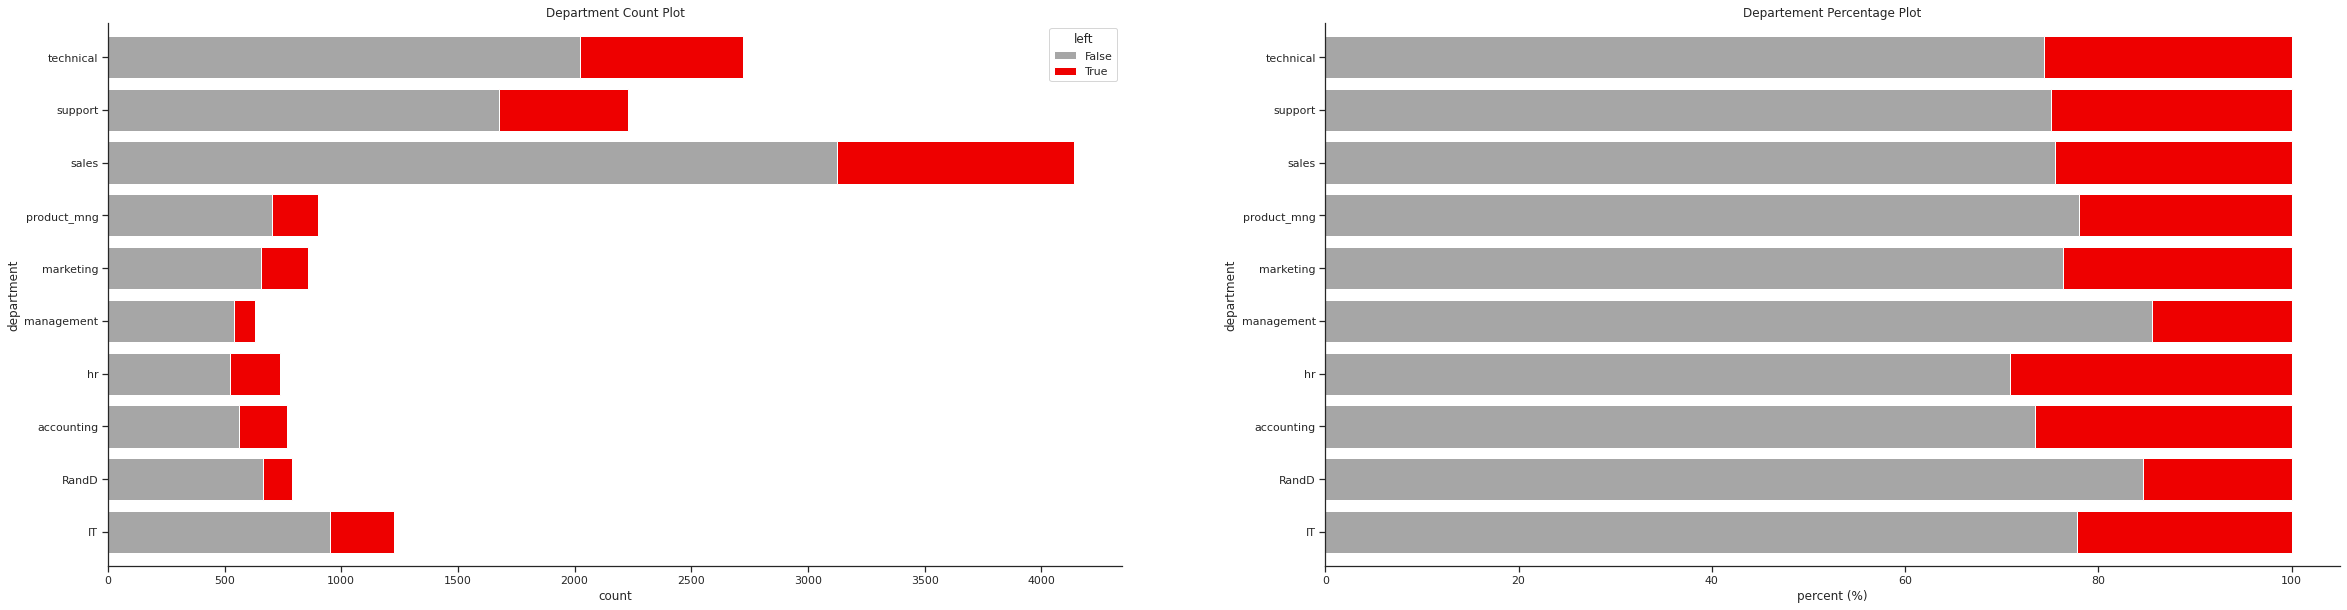

In [19]:
# department grouped
df_dept = df[['left', 'department', 'salary']]
df_dept = df_dept.groupby(['department', 'left']).agg({'salary' : 'count'})
df_dept['percent'] = df_dept.groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))
df_dept.rename(columns = {'salary' : 'jumlah'}, inplace = True)
df_dept = df_dept.reset_index()

# department visualization
rcParams['figure.figsize'] = 40, 10
fig, (ax1, ax2) = plt.subplots(1, 2)
df_dept.pivot(columns = 'left', index = 'department', values = 'jumlah').plot(kind = 'barh', stacked = True, ax = ax1, width = .8).set(title = f'Department Count Plot')
ax1.set_xlabel('count')
df_dept.pivot(columns = 'left', index = 'department', values = 'percent').plot(kind = 'barh', stacked = True, ax = ax2, width = .8).set(title = f'Departement Percentage Plot')
ax2.set_xlabel('percent (%)')
ax2.get_legend().remove()

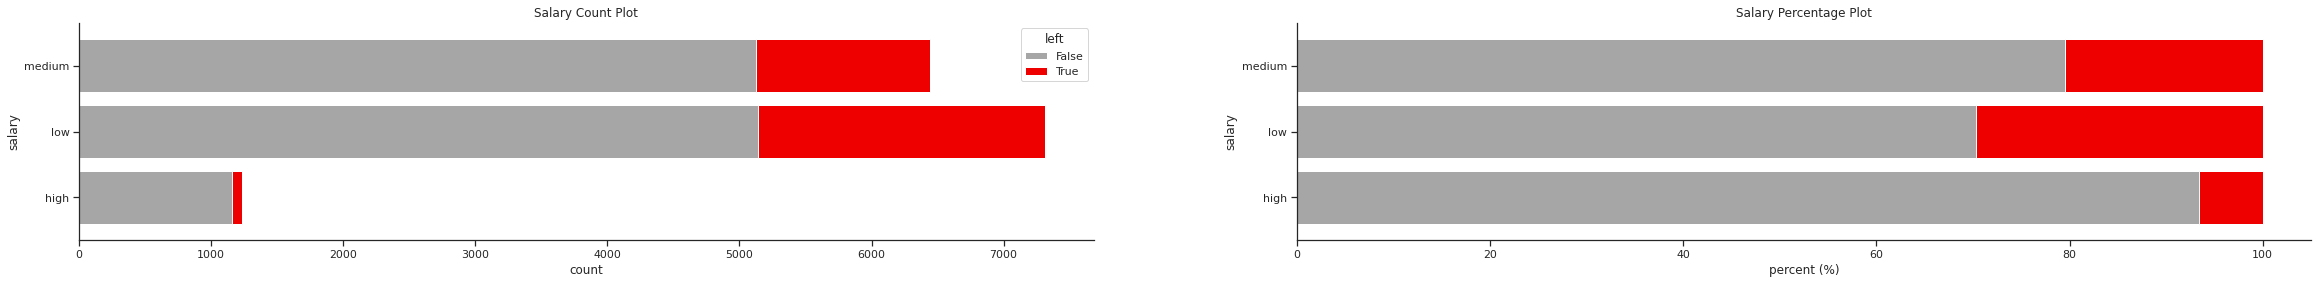

In [20]:
# salary grouped
df_salary = df[['left', 'department', 'salary']]
df_salary = df_salary.groupby(['salary', 'left']).agg({'department' : 'count'})
df_salary['percent'] = df_salary.groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))
df_salary.rename(columns = {'department' : 'jumlah'}, inplace = True)
df_salary = df_salary.reset_index()

# salary visualization
rcParams['figure.figsize'] = 40, 4
fig, (ax1, ax2) = plt.subplots(1, 2)
df_salary.pivot(columns = 'left', index = 'salary', values = 'jumlah').plot(kind = 'barh', stacked = True, ax = ax1, width = .8).set(title = f'Salary Count Plot')
ax1.set_xlabel('count')
df_salary.pivot(columns = 'left', index = 'salary', values = 'percent').plot(kind = 'barh', stacked = True, ax = ax2, width = .8).set(title = f'Salary Percentage Plot')
ax2.set_xlabel('percent (%)')
ax2.get_legend().remove()

In [21]:
df_salary

,salary,left,jumlah,percent
0,high,False,1155,93.371059
1,high,True,82,6.628941
2,low,False,5144,70.311646
3,low,True,2172,29.688354
4,medium,False,5129,79.568725
5,medium,True,1317,20.431275


## Boolean features

In [22]:
boolean = ['left', 'Work_accident', 'promotion_last_5years']
df[boolean].describe().T

,count,unique,top,freq
left,14999,2,False,11428
Work_accident,14999,2,False,12830
promotion_last_5years,14999,2,False,14680


In [23]:
df_bool = df[['left', 'promotion_last_5years', 'Work_accident', 'salary']]
df_bool = df_bool.groupby(['left', 'promotion_last_5years', 'Work_accident']).agg({'salary' : 'count'})
df_bool.rename(columns = {'salary' : 'jumlah'}, inplace = True)
df_bool = df_bool.reset_index()
df_bool

,left,promotion_last_5years,Work_accident,jumlah
0,False,False,False,9200
1,False,False,True,1928
2,False,True,False,228
3,False,True,True,72
4,True,False,False,3387
5,True,False,True,165
6,True,True,False,15
7,True,True,True,4


## Additional

** Mengapa employee yang memiliki satisfaction level > 0.5 memilih untuk meninggalkan company?**

In [24]:
df_up = df[(df['satisfaction_level'] > 0.5)]
df_up.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
False,9166,9166,9166,9166,9166,9166,9166,9166,9166
True,1021,1021,1021,1021,1021,1021,1021,1021,1021


In [25]:
df_last = df[(df['last_evaluation'] > 0.5)]
df_last.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
False,10233,10233,10233,10233,10233,10233,10233,10233,10233
True,2845,2845,2845,2845,2845,2845,2845,2845,2845


In [26]:
df_proj = df[(df['number_project'] > 4)]
df_proj.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
False,2668,2668,2668,2668,2668,2668,2668,2668,2668
True,1523,1523,1523,1523,1523,1523,1523,1523,1523


In [27]:
df_up = df[(df['satisfaction_level'] > 0.5) & df['left'] == True]
df_up.groupby(['salary']).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department
salary,,,,,,,,,
high,18,18,18,18,18,18,18,18,18
low,618,618,618,618,618,618,618,618,618
medium,385,385,385,385,385,385,385,385,385


In [28]:
df_up.groupby(['promotion_last_5years']).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,department,salary
promotion_last_5years,,,,,,,,,
False,1017,1017,1017,1017,1017,1017,1017,1017,1017
True,4,4,4,4,4,4,4,4,4


In [29]:
df_up.groupby(['Work_accident']).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,department,salary
Work_accident,,,,,,,,,
False,973,973,973,973,973,973,973,973,973
True,48,48,48,48,48,48,48,48,48


In [30]:
df_up.groupby(['time_spend_company']).count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years,department,salary
time_spend_company,,,,,,,,,
2,30,30,30,30,30,30,30,30,30
3,34,34,34,34,34,34,34,34,34
4,48,48,48,48,48,48,48,48,48
5,708,708,708,708,708,708,708,708,708
6,201,201,201,201,201,201,201,201,201


**Pair plot seluruh data**

In [31]:
df.rename(columns = {'satisfaction_level' : 'Satisfaction Level',
                        'last_evaluation' : 'Last Evaluation',
                        'average_montly_hours' : 'Average Monthly Hours'}, inplace = True)

In [32]:
df.rename(columns = {'time_spend_company' : 'Time Spend Company'}, inplace = True)

<Figure size 1440x1440 with 0 Axes>

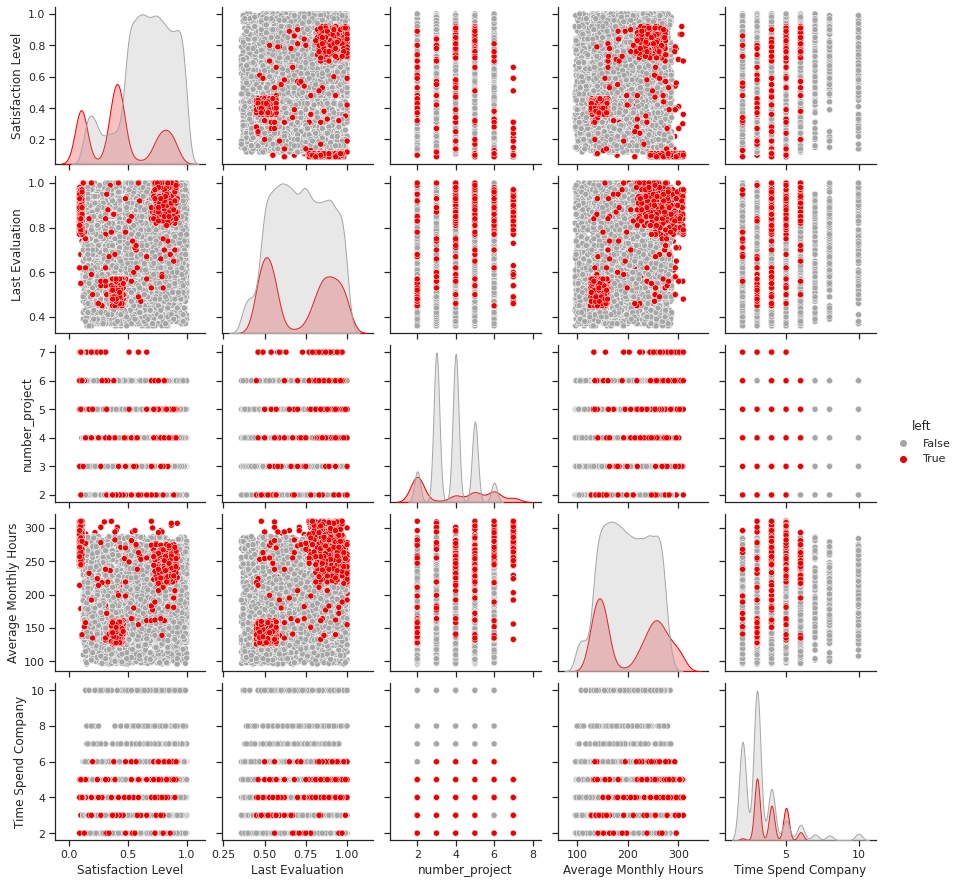

In [33]:
# pair plot dari semua feature
plt.figure(figsize=(20, 20))
num1 = ['Satisfaction Level', 'Last Evaluation', 'number_project', 'Average Monthly Hours', 'Time Spend Company', 'left']
sns.pairplot(df[num1], kind = 'scatter', diag_kind = 'kde', hue = 'left')

In [34]:
colors = ['#EE0000', '#A6A6A6']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_theme(style = 'ticks', rc = custom_params, font = 'sans-serif', palette = customPalette)

In [35]:
df_up.rename(columns = {'satisfaction_level' : 'Satisfaction Level',
                        'last_evaluation' : 'Last Evaluation',
                        'average_montly_hours' : 'Average Monthly Hours'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<Figure size 1440x1440 with 0 Axes>

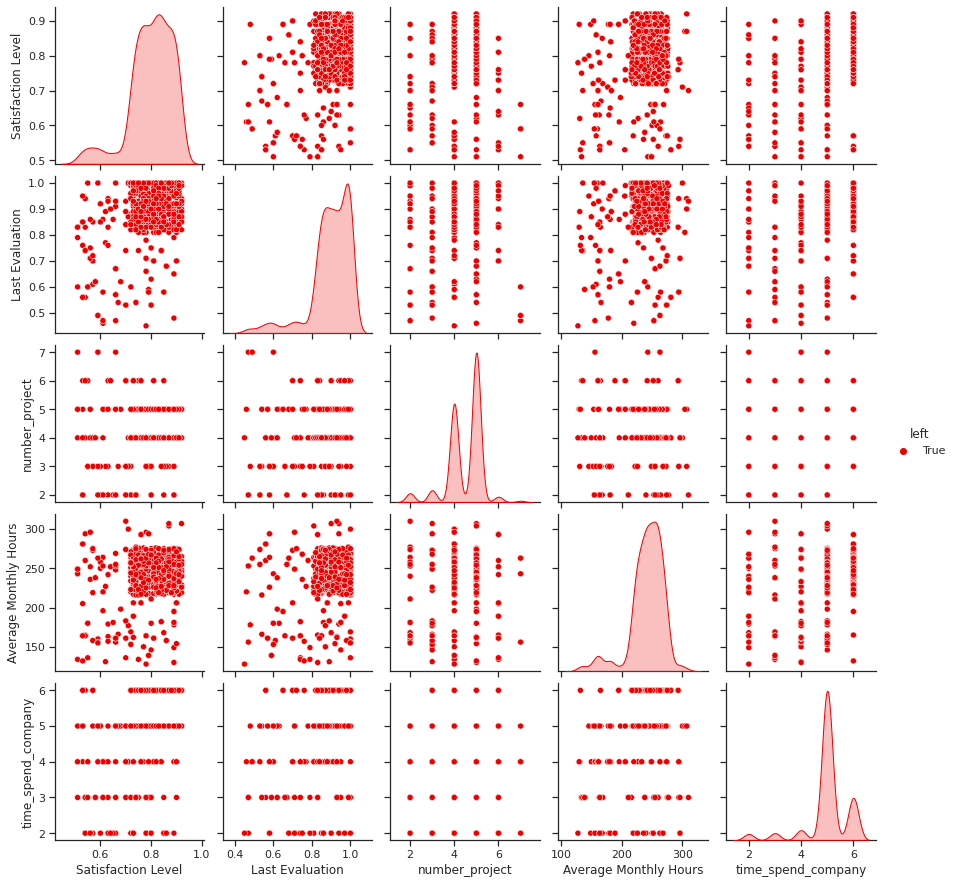

In [36]:
# pair plot dari semua feature
plt.figure(figsize=(20, 20))
num1 = ['Satisfaction Level', 'Last Evaluation', 'number_project', 'Average Monthly Hours', 'time_spend_company', 'left']
sns.pairplot(df_up[num1], kind = 'scatter', diag_kind = 'kde', hue = 'left')